In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 80s 0us/step


In [10]:
y_train[0:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [17]:
def plot_sample(index):
    plt.figure(figsize=(10,4))
    plt.imshow(x_train[index])

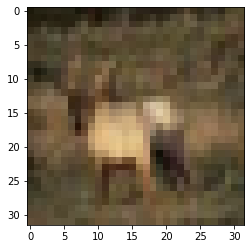

In [35]:
plot_sample(3)

In [23]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [27]:
y_train[4][0]

1

In [36]:
classes[y_train[3][0]]

'deer'

# Scaling the Dataset

In [38]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [41]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_train_categorical[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')
y_test_categorical[:6]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [45]:
32*32*3

3072

# Model

In [75]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2900,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
#Sparse_categorical_crossentropy is used when the label is a descrete value i.e 1,2,3,4,5 while categorical_crossentropy is used when one hot_encode the
#label dataset

model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 129s 82ms/step - loss: 1.8167 - accuracy: 0.3546
Epoch 2/50
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6249 - accuracy: 0.4259
Epoch 3/50
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5448 - accuracy: 0.4531
Epoch 4/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4856 - accuracy: 0.4754
Epoch 5/50
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4357 - accuracy: 0.4948
Epoch 6/50
1563/1563 [==============================] - 123s 79ms/step - loss: 1.3918 - accuracy: 0.5082
Epoch 7/50
1563/1563 [==============================] - 124s 79ms/step - loss: 1.3573 - accuracy: 0.5215
Epoch 8/50
1563/1563 [==============================] - 118s 75ms/step - loss: 1.3220 - accuracy: 0.5345
Epoch 9/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2875 - accuracy: 0.5468
Epoch 10/50
1563/1563 [==============================] 

In [61]:
def test_data(indexx):
    plt.figure(figsize=(10,3))
    plt.imshow(x_test[indexx])

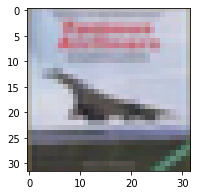

In [97]:
test_data(3)

In [96]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [71]:
x_test_scaled[0][0]

array([[0.61960784, 0.43921569, 0.19215686],
       [0.62352941, 0.43529412, 0.18431373],
       [0.64705882, 0.45490196, 0.2       ],
       [0.65098039, 0.4627451 , 0.20784314],
       [0.62745098, 0.43921569, 0.18039216],
       [0.61176471, 0.42745098, 0.16078431],
       [0.63529412, 0.45098039, 0.18431373],
       [0.62352941, 0.44313725, 0.17647059],
       [0.61960784, 0.43529412, 0.17254902],
       [0.62352941, 0.44313725, 0.16078431],
       [0.63137255, 0.45490196, 0.16078431],
       [0.62745098, 0.43529412, 0.20392157],
       [0.63137255, 0.43529412, 0.19215686],
       [0.65098039, 0.45882353, 0.16078431],
       [0.6627451 , 0.45882353, 0.17647059],
       [0.66666667, 0.46666667, 0.17254902],
       [0.65490196, 0.45882353, 0.15686275],
       [0.63529412, 0.44313725, 0.14901961],
       [0.62745098, 0.43529412, 0.15294118],
       [0.62745098, 0.43921569, 0.16862745],
       [0.61176471, 0.42745098, 0.17254902],
       [0.58431373, 0.41960784, 0.17647059],
       [0.

In [65]:
y_test[1][0]

8

In [68]:
classes[y_test[4][0]]

'frog'

In [82]:
classes[y_test[0][0]]

'cat'

In [99]:
classes[np.argmax(model.predict(x_test_scaled)[0])]

'cat'

In [93]:
y_test[3]

array([0], dtype=uint8)

In [100]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 6s 17ms/step - loss: 1.5347 - accuracy: 0.5696


[1.5346945524215698, 0.569599986076355]

In [104]:
def get_model():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2900,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
    model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
#Sparse_categorical_crossentropy is used when the label is a descrete value i.e 1,2,3,4,5 while categorical_crossentropy is used when one hot_encode the
#label dataset
    #model.fit(x_train_scaled,y_train_categorical,epochs=50)
    
    return model
    

In [105]:
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 88s 55ms/step - loss: 1.8159 - accuracy: 0.3539
